<a href="https://colab.research.google.com/github/quanghuy2506/NUSC-LDA/blob/main/LDAwithGoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Install packages***

In [ ]:
!pip install contractions
!pip install opendatasets
!pip install autocorrect
!pip install pyLDAvis

### ***Import Packages***

In [1]:
# library imports
import pandas as pd
import opendatasets
import contractions
from autocorrect import Speller
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import nltk
import re

In [2]:
#load scopus
scopus = pd.read_csv('/content/drive/My Drive/NUSC Summer School 2023 Dataset/scopus-PR.csv')
wos = pd.read_excel('/content/drive/My Drive/NUSC Summer School 2023 Dataset/WEBofScience.xls')

In [3]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
scopus_abstracts = scopus[['DOI','Authors','Title','Source title','Abstract','Author Keywords']]
scopus_abstracts

,DOI,Authors,Title,Source title,Abstract,Author Keywords
0,10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,Optimizing the Interaction Between Two Closed-...,Foundations of Computing and Decision Sciences,"Over the past few years, attention to environm...",Closed-loop supply chain; game theory; out-of-...
1,10.1007/978-3-031-24687-6_45,Thomas L.,Virtual Try-Before-You-Buy: The Impact of Virt...,Developments in Marketing Science: Proceedings...,The rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...
2,10.3390/pr10122490,Shu X.; Hu Z.,Pricing and Return Strategy Selection of Onlin...,Processes,This article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...
3,10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,Supply chain integration and halal frozen meat...,Journal of Islamic Marketing,Purpose: Halal frozen meat product returns are...,Frozen meat; Halal integration; Halal logistic...
4,10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,Two-period price competition of second-hand pr...,Computers and Industrial Engineering,Consumers who buy products from second-hand pl...,Blockchain; Demand levels; Different supply; P...
...,...,...,...,...,...,...
1680,10.1108/09600030410515691,Mukhopadhyay S.K.; Setoputro R.,Reverse logistics in e-business: Optimal price...,International Journal of Physical Distribution...,"In an Internet direct sales supply chain, the ...",Business policy; Direct selling; Internet mark...
1681,10.1111/j.1937-5956.2001.tb00075.x,Guide Jr. V.D.R.; Van Wassenhove L.N.,Managing product returns for remanufacturing,Production and Operations Management,Firms are often encouraged to offer environmen...,Economic value-analysis; Product acquisition m...
1682,10.12968/jowc.2004.13.9.26702,McGuiness W.; Vella E.; Harrison D.,Influence of dressing changes on wound tempera...,Journal of wound care,OBJECTIVE: When wound-tissue temperature falls...,NaN
1683,10.1016/S0377-2217(00)00088-6,Lee C.H.,"Coordinated stocking, clearance sales, and ret...",European Journal of Operational Research,The results of a study of inter-organizational...,Distribution; Inventory; Marketing; Supply cha...


In [5]:
wos_abstracts = wos[['DOI','Authors','Article Title','Source Title','Abstract','Author Keywords']]
wos_abstracts.columns = scopus_abstracts.columns
wos_abstracts

,DOI,Authors,Title,Source title,Abstract,Author Keywords
0,10.1007/s10668-021-01660-1,"Soleymanfar, Vahid Reza; Makui, Ahmad; Taleiza...",Sustainable EOQ and EPQ models for a two-echel...,Environment Development and Sustainability,"In this work, a new model is developed to dete...",NaN
1,NaN,"Kang, Sawoong",RETURN POLICY AS A SIGNALING DEVICE IN HORIZON...,The Korean Economic Review,We consider a market for horizontally differen...,NaN
2,NaN,"Kim，Tae-Hyun; Jeonghoon, Park; Dong-Hyun, Choi...",System Dynamics Approach to Return Policy at S...,Korean System Dynamics Review,This research consists of (1) building (or mol...,NaN
3,NaN,"Kim,, Tae-Hyun",A Dynamic Simulation on the Effectiveness of R...,Korean System Dynamics Review,This paper analysed the impact of return polic...,NaN
4,10.21131/kopoms.28.1.201702.47,"Yoo, Seung Ho","Effect of Power Dynamics on Product Quality, R...",Journal of the Korean Production and Operation...,This study investigates the impact of joint de...,NaN
...,...,...,...,...,...,...
87,10.3390/ijerph19159244,"Lyu, Shan; Chen, Yuyu; Wang, Lei",Optimal Decisions in a Multi-Party Closed-Loop...,International journal of environmental researc...,Global warming and e-waste pollution are two m...,NaN
88,10.1016/j.resconrec.2015.02.009,"Agrawal, Saurabh; Singh, Rajesh K.; Murtaza, Q...",A literature review and perspectives in revers...,Resources Conservation and Recycling,"In recent years, reverse logistics (RL) has be...",NaN
89,10.15847/cct.26508,"Pinho, Filipa; Marques, José Carlos; Góis, Pedro","Portugal e Espanha, países para regressar: Uma...","CIDADES, Comunidades e Territórios","Abstract In the international literature, ther...",NaN
90,NaN,"Zhou,, Ying Yin",A study on the Hometown Returning Process of K...,THE YEOKSA AND SILHAK,This paper aims to study on the process of ret...,NaN


In [6]:
joint_abstracts = pd.concat([scopus_abstracts, wos_abstracts])

In [7]:
#check missing abstract
joint_abstracts.isna().sum()
joint_abstracts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1777 entries, 0 to 91
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DOI              1506 non-null   object
 1   Authors          1767 non-null   object
 2   Title            1777 non-null   object
 3   Source title     1776 non-null   object
 4   Abstract         1776 non-null   object
 5   Author Keywords  1457 non-null   object
dtypes: object(6)
memory usage: 97.2+ KB


In [8]:
joint_abstracts = joint_abstracts.dropna(subset=['Abstract'],axis=0).reset_index(drop=True)
joint_abstracts

,DOI,Authors,Title,Source title,Abstract,Author Keywords
0,10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,Optimizing the Interaction Between Two Closed-...,Foundations of Computing and Decision Sciences,"Over the past few years, attention to environm...",Closed-loop supply chain; game theory; out-of-...
1,10.1007/978-3-031-24687-6_45,Thomas L.,Virtual Try-Before-You-Buy: The Impact of Virt...,Developments in Marketing Science: Proceedings...,The rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...
2,10.3390/pr10122490,Shu X.; Hu Z.,Pricing and Return Strategy Selection of Onlin...,Processes,This article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...
3,10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,Supply chain integration and halal frozen meat...,Journal of Islamic Marketing,Purpose: Halal frozen meat product returns are...,Frozen meat; Halal integration; Halal logistic...
4,10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,Two-period price competition of second-hand pr...,Computers and Industrial Engineering,Consumers who buy products from second-hand pl...,Blockchain; Demand levels; Different supply; P...
...,...,...,...,...,...,...
1771,10.3390/ijerph19159244,"Lyu, Shan; Chen, Yuyu; Wang, Lei",Optimal Decisions in a Multi-Party Closed-Loop...,International journal of environmental researc...,Global warming and e-waste pollution are two m...,NaN
1772,10.1016/j.resconrec.2015.02.009,"Agrawal, Saurabh; Singh, Rajesh K.; Murtaza, Q...",A literature review and perspectives in revers...,Resources Conservation and Recycling,"In recent years, reverse logistics (RL) has be...",NaN
1773,10.15847/cct.26508,"Pinho, Filipa; Marques, José Carlos; Góis, Pedro","Portugal e Espanha, países para regressar: Uma...","CIDADES, Comunidades e Territórios","Abstract In the international literature, ther...",NaN
1774,NaN,"Zhou,, Ying Yin",A study on the Hometown Returning Process of K...,THE YEOKSA AND SILHAK,This paper aims to study on the process of ret...,NaN


In [9]:
#check duplications from title
joint_abstracts['Title'] = joint_abstracts['Title'].str.lower()
joint_abstracts[joint_abstracts.duplicated(subset=['Title'], keep=False) == True].sort_values(by='Title')
index_drop_title = joint_abstracts[joint_abstracts.duplicated(subset=['Title'], keep='first') == True].sort_values(by='Title').index

joint_abstracts = joint_abstracts.drop(index_drop_title, axis='index')
joint_abstracts

,DOI,Authors,Title,Source title,Abstract,Author Keywords
0,10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,optimizing the interaction between two closed-...,Foundations of Computing and Decision Sciences,"Over the past few years, attention to environm...",Closed-loop supply chain; game theory; out-of-...
1,10.1007/978-3-031-24687-6_45,Thomas L.,virtual try-before-you-buy: the impact of virt...,Developments in Marketing Science: Proceedings...,The rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...
2,10.3390/pr10122490,Shu X.; Hu Z.,pricing and return strategy selection of onlin...,Processes,This article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...
3,10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,supply chain integration and halal frozen meat...,Journal of Islamic Marketing,Purpose: Halal frozen meat product returns are...,Frozen meat; Halal integration; Halal logistic...
4,10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,two-period price competition of second-hand pr...,Computers and Industrial Engineering,Consumers who buy products from second-hand pl...,Blockchain; Demand levels; Different supply; P...
...,...,...,...,...,...,...
1768,10.14695/KJSOS.2020.23.1.3,"kim, jisu; Joo, Na Young",online shopping: satisfaction of return servic...,Science of Emotion & Sensibility,"Recently, as the fashion e-commerce market has...",NaN
1770,NaN,"KIM, BYUNG IL; 이신희",a study on business year for gains and losses ...,KOOKMIN LAW REVIEW,A “purchase transaction under a special contra...,NaN
1771,10.3390/ijerph19159244,"Lyu, Shan; Chen, Yuyu; Wang, Lei",optimal decisions in a multi-party closed-loop...,International journal of environmental researc...,Global warming and e-waste pollution are two m...,NaN
1773,10.15847/cct.26508,"Pinho, Filipa; Marques, José Carlos; Góis, Pedro","portugal e espanha, países para regressar: uma...","CIDADES, Comunidades e Territórios","Abstract In the international literature, ther...",NaN


In [10]:
#detect duplications
joint_abstracts.dropna(subset=['DOI'], axis=0)[joint_abstracts.dropna(subset=['DOI'], axis=0).duplicated(subset=['DOI'], keep=False) == True].sort_values(by='DOI') #'first','last','False'
index_drop_doi = joint_abstracts.dropna(subset=['DOI'], axis=0)[joint_abstracts.dropna(subset=['DOI'], axis=0).duplicated(subset=['DOI'], keep='first') == True].index
#if you want to selectively remove you need to note the index of that row - for example 697
#for me, I trust the data quality of Scopus so I will remove the duplications from WoS -> as WOS was added later, we keep 'first'
joint_abstracts = joint_abstracts.drop(index_drop_doi, axis='index')
joint_abstracts = joint_abstracts.reset_index(drop=True)
joint_abstracts

,DOI,Authors,Title,Source title,Abstract,Author Keywords
0,10.2478/fcds-2022-0025,Trung N.D.; Huy D.T.N.; Chetthamrongchai P.; M...,optimizing the interaction between two closed-...,Foundations of Computing and Decision Sciences,"Over the past few years, attention to environm...",Closed-loop supply chain; game theory; out-of-...
1,10.1007/978-3-031-24687-6_45,Thomas L.,virtual try-before-you-buy: the impact of virt...,Developments in Marketing Science: Proceedings...,The rise of digital technologies and online bu...,Consumer purchasing behavior; E-commerce; Prod...
2,10.3390/pr10122490,Shu X.; Hu Z.,pricing and return strategy selection of onlin...,Processes,This article mainly considers the coexistence ...,consumer purchase behavior; online retailer; r...
3,10.1108/JIMA-05-2021-0144,Fernando Y.; Ahmad Jasmi M.F.; Wahyuni-TD I.S....,supply chain integration and halal frozen meat...,Journal of Islamic Marketing,Purpose: Halal frozen meat product returns are...,Frozen meat; Halal integration; Halal logistic...
4,10.1016/j.cie.2023.109131,Guo Q.; Zhao P.; Cheng S.; Ahmed M.,two-period price competition of second-hand pr...,Computers and Industrial Engineering,Consumers who buy products from second-hand pl...,Blockchain; Demand levels; Different supply; P...
...,...,...,...,...,...,...
1735,10.14695/KJSOS.2020.23.1.3,"kim, jisu; Joo, Na Young",online shopping: satisfaction of return servic...,Science of Emotion & Sensibility,"Recently, as the fashion e-commerce market has...",NaN
1736,NaN,"KIM, BYUNG IL; 이신희",a study on business year for gains and losses ...,KOOKMIN LAW REVIEW,A “purchase transaction under a special contra...,NaN
1737,10.3390/ijerph19159244,"Lyu, Shan; Chen, Yuyu; Wang, Lei",optimal decisions in a multi-party closed-loop...,International journal of environmental researc...,Global warming and e-waste pollution are two m...,NaN
1738,10.15847/cct.26508,"Pinho, Filipa; Marques, José Carlos; Góis, Pedro","portugal e espanha, países para regressar: uma...","CIDADES, Comunidades e Territórios","Abstract In the international literature, ther...",NaN


### ***Text Cleaning***

In [11]:
# initiate tqdm for pandas.apply() functions
# for checking runing progress
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [12]:
#check missing abstract
def missing_abstract(x):
  if x == '':
    return 'no abstract'
  else:
    return 'ok'

joint_abstracts['Checked_abstract'] = joint_abstracts['Abstract'].progress_apply(lambda x: missing_abstract(x))

  0%|          | 0/1740 [00:00<?, ?it/s]

In [13]:
#Lowercase your abstracts
joint_abstracts['Abstract'] = joint_abstracts['Abstract'].str.lower()

In [14]:
#remove slang
import regex as re
def clean_slang(text):
    """
    Correct common slang and abbreviations.
    """
    text = re.sub(r"\babt?\b", "about", text)
    text = re.sub(r"\bcomfy\b", "comfortable", text)
    text = re.sub(r"\brll?y\b", "really", text)
    text = re.sub(r"\bso{2,}\b", "so", text)
    text = re.sub(r"\bmed\b", "medium", text)
    text = re.sub(r"\bxx?s\b", "extra small", text)
    text = re.sub(r"\bxx?l\b", "extra large", text)
    text = re.sub(r"\bfab\b", "fabulous", text)
    text = re.sub(r"\bblk\b", "black", text)
    text = re.sub(r"\bpromo\b", "promotion", text)
    text = re.sub(r"\btts\b", "true to size", text)
    text = re.sub(r"\blbs?\b", "pounds", text)
    text = re.sub(r"\brn\b", "right now", text)
    text = re.sub(r"\bwanna\b", "want to", text)
    text = re.sub(r"\bgonn[ao]\b", "going to", text)
    text = re.sub(r"\btho\b", "though", text)
    text = re.sub(r"altho ", "although ", text)
    text = re.sub(r"prolly", "probably", text)
    text = re.sub(r"asap", "as soon as possible", text)
    text = re.sub(r"\bbc|b/c\b", "because", text)
    text = re.sub(r"\bavail\b", "available", text)
    text = re.sub(r"\bdiff\b", "different", text)
    text = re.sub(r"\bnxt|enxt\b", "next", text)
    text = re.sub(r" w/ ", " with ", text)
    text = re.sub(r"\bdidn ", "didn't ", text)
    text = re.sub(r" dnt ", " don't ", text)
    text = re.sub(r"\bsnd\b", "send", text)
    text = re.sub(r"b4\b", "before", text)
    text = re.sub(r"stink'n", "stinking", text)
    text = re.sub(r"\batm\b", "at the moment", text)
    text = re.sub(r"\besp\b", "especially", text)
    text = re.sub(r"\bavg\b", "average", text)
    text = re.sub(r"(\d'|\d\")\s?(\d+'|\d+\")?", " ", text) # removes height measurements
    text = re.sub(r"'\d+\w+'", " ", text)
    text = re.sub(r"\s{2,}", " ", text).strip()
    return text

In [15]:
a = 'I want to finish this asap'
b = 'The house is rlly big'
c = "I'm doing homework atm"
clean_slang(c)

"I'm doing homework at the moment"

In [16]:
joint_abstracts['Abstract'] = joint_abstracts['Abstract'].progress_apply(clean_slang) # or lambda x: clean_slang(x)

  0%|          | 0/1740 [00:00<?, ?it/s]

In [17]:
def cont_expand(text):
    """
    Expand contractions (i.e don't->do not, can't-> cannot).
    """
    expanded_text = contractions.fix(text, slang=False)
    return expanded_text
a = "I can't do that job"
cont_expand(a)

'I cannot do that job'

In [18]:
# expand contractions
joint_abstracts['Abstract'] = joint_abstracts['Abstract'].progress_apply(cont_expand)

  0%|          | 0/1740 [00:00<?, ?it/s]

In [19]:
joint_abstracts['Abstract'].values[:50]

array(['over the past few years, attention to environmental problems, legal necessities, and economic advantages emerging from reproduction activities has attracted attention to reverse logistics activities in the form of a closed-loop supply chain, whether in industry or scientific research. the current study aims to model competitiveness and comparison between two closed-loop three-level supply chains, each of which includes a manufacturer, a retailer, and a third party to collect the products used by the customer, taking into account the concepts of game theory and the existence of aggregates. moreover, a separate supplier for each chain is considered. in the forward supply chain, the manufacturer produces new products using new components or re-used products that have been collected from the consumer, then sells these products mainly to the retailer, and the retailer sells them. in the reverse chain, the collector provides the used products to the manufacturer after collection. the

In [20]:
#Customise cleaning function
#Depending on your data noises
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
def tokenizer(x):
  return word_tokenize(x)

import string
def customised_cleaning_function(x):
    #first have to remove punctuations - some topic models don't require this stage to retain the contextual meaning - for example - Deep learning topic model
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    x = re_punc.sub("", x)
    # remove copyright notes
    x = re.sub(r'\©.+','',x)
    x = re.sub(r'\(c\)\s\d{4}.+','',x)
    list_of_copyrights = ['\[copyright &y& elsevier\].+','\[abstract from author].+']
    x = re.sub(r'|'.join(list_of_copyrights),'',x)
    #tokenize the abstract into a list of words
    x = tokenizer(x) # or x = x.split(" ")
    #remove all tokens that are not alphabetic
    x = [word for word in x if word.isalpha()]
    # filter out short tokens
    x = [word for word in x if len(word) > 1]
    x = " ".join(x)
    # strip multiple spaces
    x = re.sub(' +',' ', x)
    x = re.sub("\n","", x)
    x = re.sub(r"'s\b","", x)
    return x

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
joint_abstracts['Abstract'][12]

'despite growing interest in the return of rejected asylum seekers, irregular migrants, and refugees, we do not know enough about how geopolitics affects returns governance. this article addresses this knowledge gap by analysing the case of turkey, exploring how positions in the global migration regime and relations with countries of origin influence return policies. it first argues that turkey’s geopolitical reasoning has led it to design an asylum regime, including repatriation and deportation procedures, centred on temporariness. second, it contends that turkey’s extraterritorial space-making strategies–namely, military intervention in syria and humanitarian/development projects in afghanistan–guide return policies. examining the turkish case contributes to our understanding of national returns governance in transit-turned-host countries, which increasingly emphasise repatriation over long-term protection. finally, the paper contributes more generally to our understanding of the geo

In [22]:
customised_cleaning_function(joint_abstracts['Abstract'][12])

'despite growing interest in the return of rejected asylum seekers irregular migrants and refugees we do not know enough about how geopolitics affects returns governance this article addresses this knowledge gap by analysing the case of turkey exploring how positions in the global migration regime and relations with countries of origin influence return policies it first argues that turkey geopolitical reasoning has led it to design an asylum regime including repatriation and deportation procedures centred on temporariness second it contends that turkey extraterritorial spacemaking military intervention in syria and humanitariandevelopment projects in return policies examining the turkish case contributes to our understanding of national returns governance in transitturnedhost countries which increasingly emphasise repatriation over longterm protection finally the paper contributes more generally to our understanding of the geopolitics of returns by focusing on specific mechanisms that 

In [23]:
# expand contractions
joint_abstracts['Abstract'] = joint_abstracts['Abstract'].progress_apply(customised_cleaning_function)

  0%|          | 0/1740 [00:00<?, ?it/s]

In [24]:
#tokenize words
joint_abstracts['Abs_list_words'] = joint_abstracts['Abstract'].progress_apply(tokenizer)
data_words = list(joint_abstracts['Abs_list_words'])

  0%|          | 0/1740 [00:00<?, ?it/s]

In [25]:
import gensim
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10, max_vocab_size=40000000,
                               delimiter='_', progress_per=10000, scoring='default',
                               connector_words=ENGLISH_CONNECTOR_WORDS) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20,connector_words=ENGLISH_CONNECTOR_WORDS)
# Faster way to get a sentence clubbed as a trigram/bigram for one single
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Define functions for bigrams and trigrams for multiple documents
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [26]:
ENGLISH_CONNECTOR_WORDS

frozenset({'a',
           'an',
           'and',
           'at',
           'by',
           'for',
           'from',
           'in',
           'of',
           'on',
           'or',
           'the',
           'to',
           'with',
           'without'})

In [27]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[12]]])

['despite', 'growing', 'interest', 'in', 'the', 'return', 'of', 'rejected', 'asylum_seekers', 'irregular_migrants', 'and', 'refugees', 'we', 'do_not', 'know', 'enough', 'about', 'how', 'geopolitics', 'affects', 'returns', 'governance', 'this_article', 'addresses', 'this', 'knowledge', 'gap', 'by', 'analysing', 'the', 'case', 'of', 'turkey', 'exploring', 'how', 'positions', 'in', 'the', 'global', 'migration', 'regime', 'and', 'relations', 'with', 'countries_of_origin', 'influence', 'return_policies', 'it', 'first', 'argues_that', 'turkey', 'geopolitical', 'reasoning', 'has_led', 'it', 'to', 'design', 'an', 'asylum', 'regime', 'including', 'repatriation', 'and', 'deportation', 'procedures', 'centred', 'on', 'temporariness', 'second', 'it', 'contends', 'that', 'turkey', 'extraterritorial', 'spacemaking', 'military', 'intervention', 'in', 'syria', 'and', 'humanitariandevelopment', 'projects', 'in', 'return_policies', 'examining', 'the', 'turkish', 'case', 'contributes', 'to', 'our', 'under

In [28]:
# NLTK Stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words.extend(['would','could','product','return'])
#you can remove a stopword by using
#stop_words.remove(['would','could'])

# Define functions for stopwords
def remove_stopwords(texts):
    return [[word for word in doc if word not in stop_words] for doc in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
import spacy
#!pip install --upgrade click
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
# Define functions for lemmatization
nlp = spacy.load("en_core_web_sm")

def lemmatization(texts, allowed_postags=['NOUN','ADJ', 'VERB','PROPN','ADV','PROP']):
    """https://spacy.io/usage/linguistic-features"""
    """https://github.com/explosion/spaCy/blob/master/spacy/glossary.py"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [30]:
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()

def stemming(texts):
    texts_out = []
    for doc in texts:
        texts_out.append([stemmer.stem(token) for token in doc])
    return texts_out

# Do lemmatization
data_lemmatized = stemming(data_words)

In [31]:
# Do lemmatization
data_lemmatized = lemmatization(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_lemmatized)

# Form Bigrams
data_words_trigrams = make_bigrams(data_words_bigrams)

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words_trigrams)

print(data_words_nostops[20])

['rise', 'consumer', 'concern', 'business', 'responsibility', 'environment', 'closedloop_supply', 'chain', 'green', 'design', 'consider', 'reverse_logistic', 'return_policy', 'receive', 'attention', 'due', 'increase', 'consumer', 'concern', 'corporate', 'responsibility', 'environment', 'hence', 'article', 'present', 'sustainable', 'supply_chain', 'model', 'waste', 'reduction', 'incorporate', 'reverse_logistic', 'operation', 'suitable', 'return_policy', 'discuss', 'deteriorate', 'item', 'incorporate', 'ecodesign', 'framework', 'carbon_emission', 'major', 'environmental', 'issue', 'penalty', 'tax', 'pollute', 'introduce', 'reduce', 'carbon_emission', 'model', 'consider', 'cost', 'carbon_emission', 'transportation', 'storage', 'production', 'landfille', 'building', 'construction', 'power', 'supply', 'loadingunloade', 'previous', 'study', 'study', 'investigate', 'compare', 'optimization', 'technique', 'base', 'cooperative', 'noncooperative', 'association', 'mathematical', 'formulation', 'p

In [ ]:
print(data_words_nostops[20])

['rise', 'consumer', 'concern', 'business', 'responsibility', 'environment', 'closedloop_supply', 'chain', 'green', 'design', 'consider', 'reverse_logistic', 'return_policy', 'receive', 'attention', 'due', 'increase', 'consumer', 'concern', 'corporate', 'responsibility', 'environment', 'hence', 'article', 'present', 'sustainable', 'supply_chain', 'model', 'waste', 'reduction', 'incorporate', 'reverse_logistic', 'operation', 'suitable', 'return_policy', 'discuss', 'deteriorate', 'item', 'incorporate', 'ecodesign', 'framework', 'carbon_emission', 'major', 'environmental', 'issue', 'penalty', 'tax', 'pollute', 'introduce', 'reduce', 'carbon_emission', 'model', 'consider', 'cost', 'carbon_emission', 'transportation', 'storage', 'production', 'landfille', 'building', 'construction', 'power', 'supply', 'loadingunloade', 'previous', 'study', 'study', 'investigate', 'compare', 'optimization', 'technique', 'base', 'cooperative', 'noncooperative', 'association', 'mathematical', 'formulation', 'p

### ***Latent Dirichlet Allocation***

In [32]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops)
id2word.filter_extremes(no_below=0.2, no_above = 0.8)

# Create Corpus
texts = data_words_nostops

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 7), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 3), (45, 1), (46, 3), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 1), (81, 2), (82, 1), (83, 1)]


In [ ]:
%%time
import gensim
from pprint import pprint

# Build LDA model
# https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10, #this will be tuned later
                                            random_state= 9,
                                            update_every=1, #Number of documents to be iterated through for each update. Set to 0 for batch learning, > 1 for online iterative learning.
                                            alpha='auto',
                                            eta = 'auto',
                                            iterations = 1000,
                                            per_word_topics=True,
                                            minimum_probability = 0.0
                                           )
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_topics = 10, num_words=10))
doc_lda = lda_model[corpus]

In [74]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. the lower of the absolute value the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.782849321468333

Coherence Score:  0.36891630129257796


In [ ]:
# Gensim
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list: List of LDA topic models
    perplexity_values: Coherence values corresponding to the LDA model with respective number of topics
    coherence_values: Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    perplexity_values = []
    count = 0
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics, #this will be tuned later
                                            random_state= 9,
                                            update_every=2, # Number of documents to be iterated through for each update. Set to 0 for batch learning, > 1 for online iterative learning.
                                            alpha='auto',
                                            eta = 'auto',
                                            iterations = 1000,
                                            per_word_topics=True,
                                            minimum_probability = 0.0)
        model_list.append(model)
        perplexity_values.append(model.log_perplexity(corpus))
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        count+=1
        print(count)
    return model_list, coherence_values, perplexity_values
# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=id2word, corpus=corpus,
                                                                           texts=data_words_nostops, start=2,
                                                                           limit=12, step=1) # 52 or 72

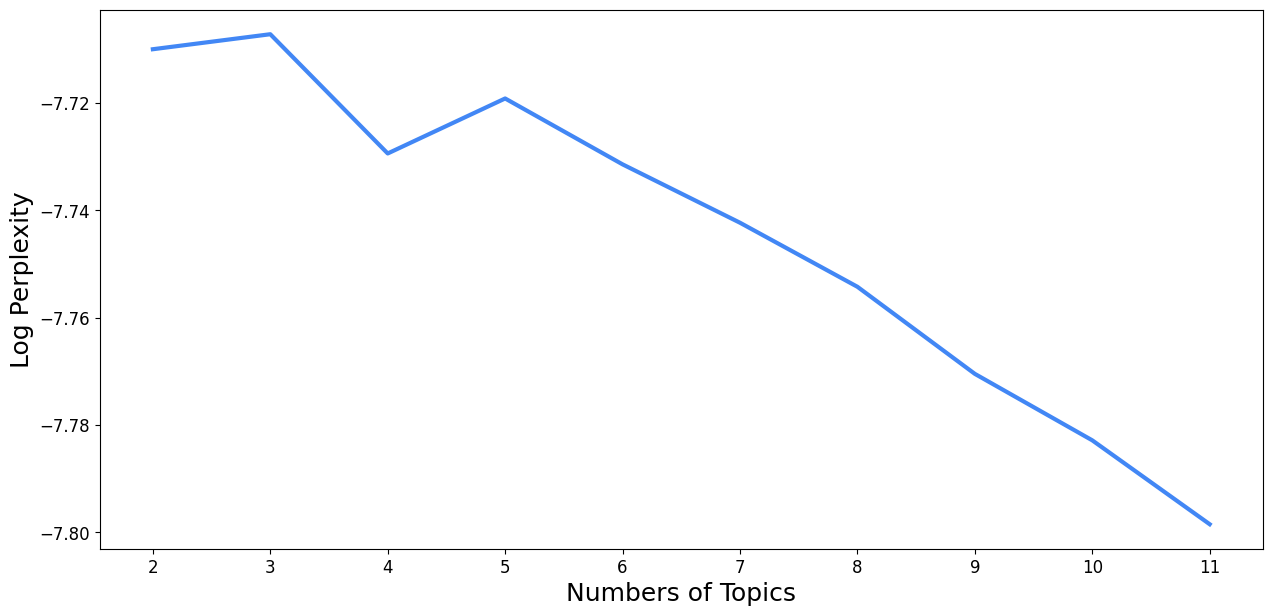

In [37]:
# Get the number of topics with the highest coherence score
import numpy as np
from operator import itemgetter, attrgetter
limit=12; start=2; step=1;
x = range(start, limit, step)
scores = list(zip(x, perplexity_values))

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    x,
    perplexity_values,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Numbers of Topics", fontsize=18)
plt.ylabel("Log Perplexity", fontsize=18)
plt.xticks(np.arange(2, max(x) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

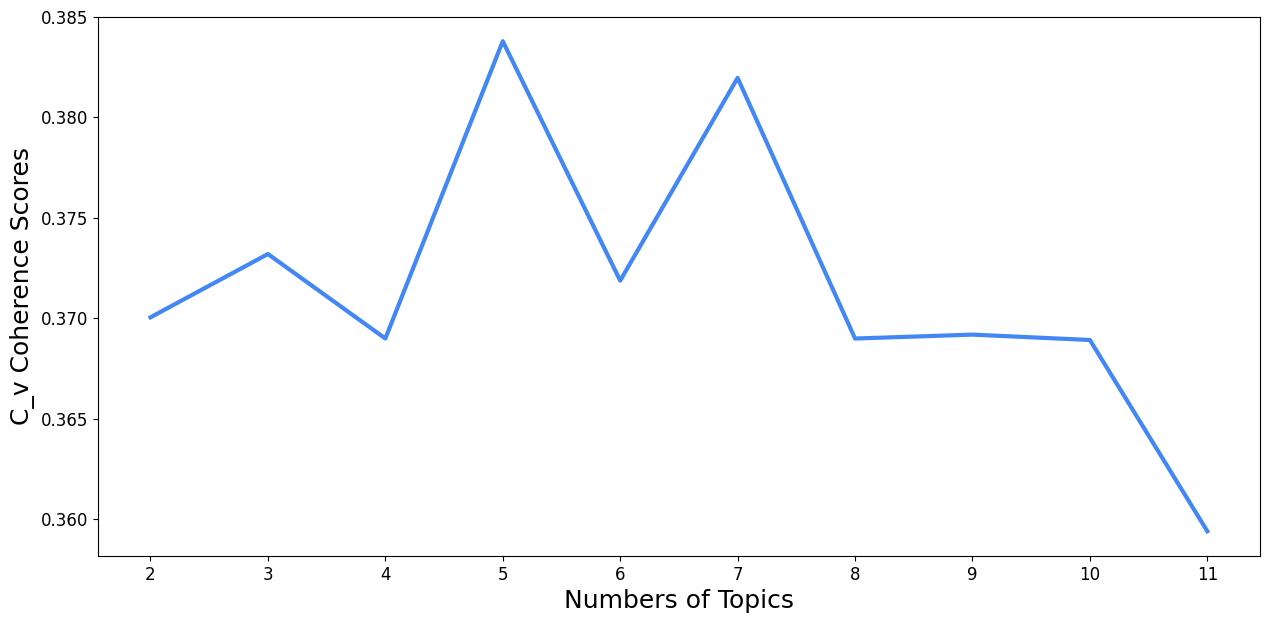

In [38]:
# Get the number of topics with the highest coherence score
from operator import itemgetter, attrgetter
limit=12; start=2; step=1;
x = range(start, limit, step)
scores = list(zip(x, coherence_values))

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    x,
    coherence_values,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Numbers of Topics", fontsize=18)
plt.ylabel("C_v Coherence Scores", fontsize=18)
plt.xticks(np.arange(2, max(x) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
import gensim
from pprint import pprint

# Build LDA model
# https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state= 9,
                                            update_every=2, #Number of documents to be iterated through for each update. Set to 0 for batch learning, > 1 for online iterative learning.
                                            alpha='auto',
                                            eta = 'auto',
                                            iterations = 1000,
                                            per_word_topics=True,
                                            minimum_probability = 0.0
                                           )
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_topics = 5, num_words=10))
doc_lda = lda_model[corpus]

In [ ]:
# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim  for old versions of pyLDAvis
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds', sort_topics=False, R=10)

vis

In [ ]:
#Save LDAvis
pyLDAvis.save_html(vis, 'lda_v1.html')

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
#merge with the original documents
df_dominant_topic = df_dominant_topic.join(joint_abstracts)
# Show
df_dominant_topic.head(10)

In [ ]:
#Get the most representative documents per topic
topicn = 0
subset = df_dominant_topic[df_dominant_topic.Dominant_Topic == 0].sort_values(by='Topic_Perc_Contrib', ascending= False)
subset

In [ ]:
# Get topic distribution per document
optimal_topics = 5
distribution = []
for i, row in enumerate(lda_model[corpus]):
  distribution.append([per for per in row])

distribution = pd.DataFrame([doc[0] for doc in distribution], columns = [f'Topic {i}'.format(i=i) for i in range(optimal_topics)])

def strip_topnum(x):
    return x[1]
for i in distribution.columns:
    distribution[i] = distribution[i].progress_apply(strip_topnum)

distribution.head(5)